### Classifying Red wine and White wine using PCA

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("C:\\Users\\orion\\OneDrive\\Desktop\\Datasets\\Wine.csv")
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [20]:
# distinguishing red and white wine

w = data["Flavanoids"].values
r = data["Proanthocyanins"].values

avg_al = np.mean(data["Alcohol"])

result = []
for i in range(len(w)):
    if w[i] > r[i]:
        result.append(0) # high flavanoids result in white colour
    elif w[i] == r[i]:
        if data.iloc[i,0] > avg_al: 
            result.append[0] # other than flavanoids, alcohol is also a contributor in the intense taste of white wine. higher alcohol = white wine
    else:
        result.append(1) # high proanthocyanins results in red colour

data["Colour"] = result
data["Colour"].values # 0 means white wine. 1 means red wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [12]:
X = data.drop(columns = ["Colour"])
Y = data["Colour"]

In [15]:
# standardizing data
scaler = StandardScaler()
df = scaler.fit_transform(data)

In [16]:
# applying PCA
pca = PCA(n_components = 2)  # Use 2 components for simplicity, data is 2D
principal_components = pca.fit_transform(df)

In [17]:
# Eigenvalues
eigenvalues = pca.explained_variance_
print("Eigenvalues:")
print(eigenvalues)

# Eigenvectors
eigenvectors = pca.components_
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[6.08248793 2.59002822]

Eigenvectors:
[[-0.11359992  0.21908413  0.00336816  0.20842655 -0.1033957  -0.34018926
  -0.37738125  0.25774016 -0.25171597  0.10517688 -0.27509878 -0.34003422
  -0.24114433  0.37861537  0.30520867]
 [ 0.48437743  0.19571034  0.29654292 -0.04217645  0.31267384  0.09822088
   0.02746187  0.00389818  0.08630598  0.51191827 -0.24853736 -0.12779486
   0.38657581 -0.02591434  0.17735276]]


In [18]:
# reduced data
pca_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df["Colour"] = Y 
pca_df

,Principal Component 1,Principal Component 2,Colour
0,-3.487454,1.661852,0
1,-2.620895,-0.193271,0
2,-2.804052,1.174271,0
3,-3.829559,2.970633,0
4,-1.521987,0.837404,0
...,...,...,...
173,3.996047,2.082197,1
174,3.331800,1.709204,1
175,3.464756,2.714100,1
176,3.192361,2.290667,1


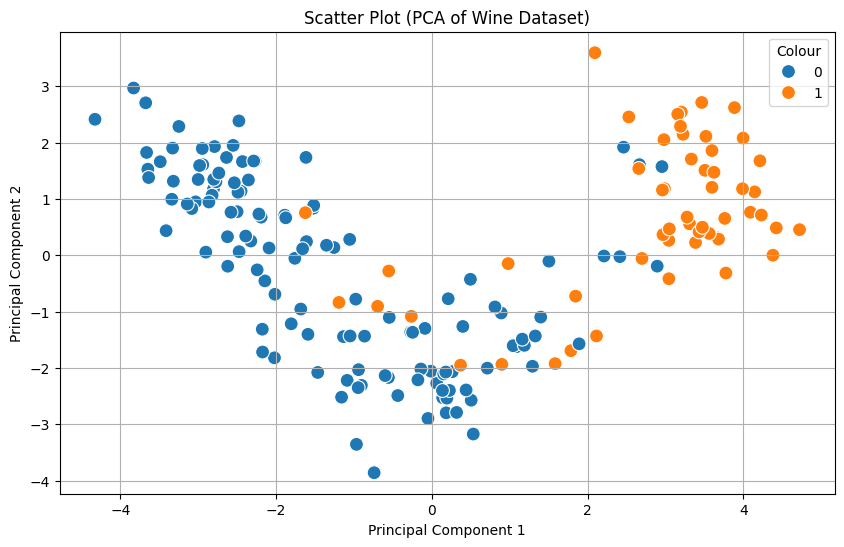

In [21]:
# plotting reduced data
import seaborn as sns

# Plot the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x = pca_df['Principal Component 1'], y = pca_df['Principal Component 2'], hue = pca_df["Colour"], s=100)
# Add plot details
plt.title('Scatter Plot (PCA of Wine Dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Colour')
plt.grid(True)
plt.show()